# TP1 GBM6700E - Calibration of a radiographic system

## Hélène Gardaire
## Adrien Coutelle

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

### Load mat files



In [2]:
#load mat files 

mat_contents = sio.loadmat('Calib_Beads2D.mat')

Beads2D_calib_PA0 = mat_contents['Beads2D_PA0'][0]
Beads2D_calib_PA20 = mat_contents['Beads2D_PA20'][0]

mat_contents = sio.loadmat('Vertebrae2D.mat')

Beads2D_vert_PA0 = mat_contents['Vertebrae_PA0']
Beads2D_vert_PA20 = mat_contents['Vertebrae_PA20']

mat_contents = sio.loadmat('Calib_Beads3D.mat')

Beads3D_calib = mat_contents['Calib_Beads3D'][0]


print(Beads2D_calib_PA0[0][1][0][1])


854


## Calibration

In [3]:
def create_equations(mat2D,mat3D):
    A = []
    B = []
    for line3D in mat3D:
        for line2D in mat2D:
            if line2D[0]==line3D[0]:
                A.append([line3D[1][0][0],
                          line3D[1][0][1],
                          line3D[1][0][2],
                          1,
                          0,
                          0,
                          0,
                          0,
                          -line2D[1][0][0]*line3D[1][0][0],
                          -line2D[1][0][0]*line3D[1][0][1],
                          -line2D[1][0][0]*line3D[1][0][2]])
                B.append([line2D[1][0][0]])
                A.append([0,
                          0,
                          0,
                          0,
                          line3D[1][0][0],
                          line3D[1][0][1],
                          line3D[1][0][2],
                          1,
                          -line2D[1][0][1]*line3D[1][0][0],
                          -line2D[1][0][1]*line3D[1][0][1],
                          -line2D[1][0][1]*line3D[1][0][2]])
                B.append([line2D[1][0][1]])
    return np.array(A),np.array(B)
    

def common_beads(mat2D_PA0, mat2d_PA20):
    common_beads_list=[]
    for line0 in mat2D_PA0:
        for line20 in mat2d_PA20:
            if line0[0]==line20[0]:
                common_beads_list.append(line0[0])
    return common_beads_list

In [4]:
create_equations(Beads2D_calib_PA0,Beads3D_calib)

/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:15: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][0],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:16: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][1],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:17: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][2]])
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:27: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][1]*line3D[1][0][0],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:28: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][1]*line3D[1][0][1],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:29: RuntimeWarning: overflow encountered in scalar 

(array([[-6.02639000e+02,  9.55440000e+01,  2.13567000e+02, ...,
         -2.33221293e+05,  3.69755280e+04,  8.26504290e+04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          5.14653706e+05, -8.15945760e+04, -1.82386218e+05],
        [-6.02658000e+02,  9.53980000e+01,  1.94395000e+02, ...,
         -2.33228646e+05,  3.69190260e+04,  7.52308650e+04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          4.31676000e+02, -4.77996120e+04, -5.53667940e+04],
        [ 1.79200000e+00, -1.26412000e+02, -2.67746000e+02, ...,
         -5.80608000e+02,  4.09574880e+04,  8.67497040e+04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.23468800e+03, -8.70978680e+04, -1.84476994e+05]]),
 array([[-387.],
        [ 854.],
        [-387.],
        [ 780.],
        [-385.],
        [ 481.],
        [-383.],
        [ 185.],
        [-383.],
        [ 111.],
        [-382.],
        [-187.],
        [-290.],
        

In [13]:
# Let's find L1...L11 using np.linalg.solve

A,B = create_equations(Beads2D_calib_PA0,Beads3D_calib)
print(A.shape)
print(B.shape)

L,_,_,_ = np.linalg.lstsq(A, B, rcond=None)
print(L)

(108, 11)
(108, 1)
[[ 8.79323847e-02]
 [-3.01741827e+00]
 [ 5.28130050e-03]
 [ 7.06162469e+00]
 [-1.49072726e-01]
 [ 7.40178784e-02]
 [ 2.85790933e+00]
 [ 8.86344246e+00]
 [-3.39160447e-06]
 [ 1.20503122e-05]
 [ 2.24076650e-06]]


/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:15: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][0],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:16: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][1],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:17: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][0]*line3D[1][0][2]])
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:27: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][1]*line3D[1][0][0],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:28: RuntimeWarning: overflow encountered in scalar negative
  -line2D[1][0][1]*line3D[1][0][1],
/var/folders/m9/y43c48k57wd1k_m7c5rgtrvm0000gn/T/ipykernel_81103/501707960.py:29: RuntimeWarning: overflow encountered in scalar 

## Reconstruction

In [6]:
M = np.ones((3,4))
for i in range(len(L)):
    M[int(i/4)][i%4] = L[i][0]

In [7]:
inv_M = (np.linalg.inv(M.T.dot(M))).dot(M.T)

# Tests de reconstruction des coordonnées 3D à partir des coordonnées 2D

def reconstruction_one_point(coord2D):
    return np.dot(inv_M,coord2D)

print(reconstruction_one_point([Beads2D_calib_PA0[0][1][0][0],Beads2D_calib_PA0[0][1][0][1],1]))
print(reconstruction_one_point([Beads2D_calib_PA0[1][1][0][0],Beads2D_calib_PA0[1][1][0][1],1]))

def reconstruction_all_beads(mat2D):
    L = []
    for coord2D in mat2D:
        L.append(reconstruction_one_point([coord2D[1][0][0],coord2D[1][0][1],1]))
    return np.array(L)

def reconstruction_vertebrae(mat2D):
    L = []
    for vertebre in mat2D:
        for point in vertebre[0][1][0]:
            L.append(reconstruction_one_point([point[1][0][0],point[1][0][1],1]))
    return np.array(L)

[ 1.44221544e+04  7.98974142e+01 -8.78010433e+01  1.00119487e+00]
[ 1.32757129e+04  9.31381878e+01 -8.01409131e+01  1.00087346e+00]


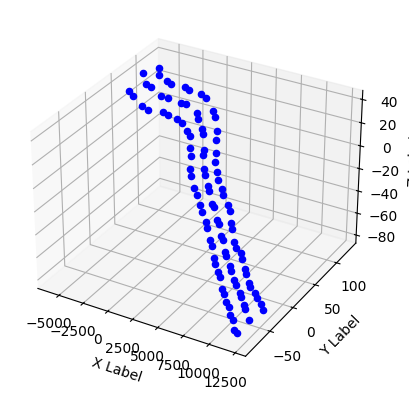

In [9]:


def plot_3D_points(mat3D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for line in mat3D:
        ax.scatter(line[0],line[1],line[2],c='b',marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()



plot_3D_points(reconstruction_vertebrae(Beads2D_vert_PA0))

    

question 1.2 pas nécessaire pour la suite du TP, c juste pour aider pour l'interpretation 